# data cleaning by maxime

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [24]:
df=pd.read_excel("C:\\Users\\NISR\\Desktop\\EICV4_b\\data cleaning\\Data.xlsx")
df.head(1)

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,less than one year


In [25]:
# size of the dataframe
df.shape

(26, 6)

In [26]:
df=df.copy()
df.head(1)

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,less than one year


## identifying and treating duplicates,inconsistent values,missing values,outliers,detection and treatment of data types

In [64]:
#### 1.detection of duplicates
df.duplicated().sum()

0

In [66]:
#treatment of duplicates
df.drop_duplicates(inplace=True)

In [67]:
# re-examine the duplicates
df.duplicated().sum()

0

In [30]:
### exploration of data types
df.dtypes

Unnamed: 0         float64
ID                   int64
sex                 object
Province            object
Education level     object
Age                 object
dtype: object

In [68]:
#uko bazi cleaninga data types nnho
# changing the qualitative variables to category type
df['sex']=df['sex'].astype("category")
df['Province']=df['Province'].astype("category")
df['Education level']=df['Education level'].astype("category")
#df['Age']=df['Age'].astype("float")
df.head(1)

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,0.0


In [32]:
# re eximining the dtypes
df.dtypes

Unnamed: 0          float64
ID                    int64
sex                category
Province           category
Education level    category
Age                  object
dtype: object

In [74]:
# detecting the inconsistent value for age
df['Age'].unique()

array([ 0., 24., 33., 45., 20.])

In [75]:
# treatment of inconsistent values for quantitative variables
df['Age']=df['Age'].replace({'less than one year':0})
df.head(1)

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,0.0


In [71]:
# re examine the age
df['Age'].unique()

array([ 0., 24., 33., 45., 20.])

In [72]:
df['Age'].head(1)

0    0.0
Name: Age, dtype: float64

In [73]:
df.dtypes

Unnamed: 0          float64
ID                    int64
sex                category
Province           category
Education level    category
Age                 float64
dtype: object

In [38]:
# the inconsistent values for categorical variables (column)
#=================================================================
# hano dukeneye kureba niba sex is either clean or erroneous
df['sex'].unique()

['Male', 'Male ', 'Fema', 5, 'Female', 'm', 'F']
Categories (7, object): ['Male', 'Male ', 'Fema', 5, 'Female', 'm', 'F']

In [79]:
# kuberako sex yari categorical urabanza ukayihindura object ukoresheje iyi formula
df['sex']=df['sex'].astype("object")

In [40]:
# treatment of sex
df['sex']=df['sex'].replace({'m':'Male','F':'Female','Fema':'Female','Male ':'Male',5:np.nan})
df.head(1)

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,0.0


In [41]:
# nyuma yo gu treatinga sex uhita garura ya sex as categorical ubundi uka runninga
df['sex']=df['sex'].astype("category")

In [42]:
# re examine 
df['sex'].unique()

['Male', 'Female', NaN]
Categories (2, object): ['Male', 'Female']

In [78]:
# Checking the missing values
df['sex'].unique()

['Male', 'Female']
Categories (2, object): ['Male', 'Female']

In [44]:
df['sex'].isnull().sum()

1

In [45]:
# Treatment
MODE=df['sex'].mode()[0]
df['sex']=df['sex'].fillna(MODE)
df.head()

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,0.0
1,NaN,2,Male,Kiga City,pr,24.0
2,NaN,3,Female,Kigali City,pr,33.0
3,NaN,4,Male,Eastern,Uni,45.0
4,NaN,5,Female,Northen,Uni,20.0


In [47]:
# Re-Examining
df['sex'].isnull().sum()

0

In [48]:
# Exploring the age variable
df['Age'].isnull().sum()

2

<AxesSubplot:xlabel='Age', ylabel='Count'>

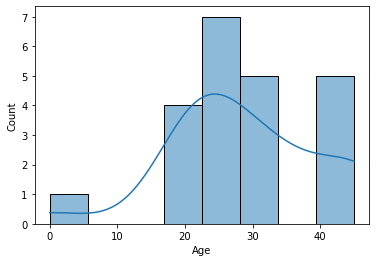

In [49]:
#Testing the distribution
sns.histplot(df['Age'],kde=True)

In [50]:
# since the data are skewed to the left ,we replace the missing value by median
Median=df['Age'].median()
df['Age']=df['Age'].fillna(Median)
df.head(1)

,Unnamed: 0,ID,sex,Province,Education level,Age
0,NaN,1,Male,Souther,pr,0.0


In [46]:
df['Age'].isnull().sum()


2

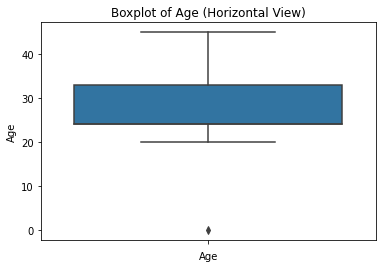

In [60]:
sns.boxplot(y=df['Age'])  # Horizontal boxplot
plt.xlabel("Age")
plt.title("Boxplot of Age (Horizontal View)")
plt.show()

In [62]:
# sinceage is experiencing an outlier, we replace the missing value by median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [63]:
# re examinung age again
df['Age'].isnull().sum()

0